# Linear Regression Lab

Install packages from requirements.txt

In [4]:
%pip install -r requirements.txt > /dev/null 2>&1

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats. outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

## Simple linear regression
Using simple linear regression on the Boston data set contained within the ISLP package.<br />
the goal of linear regression is to create a function for which $Y \approx \beta_0 + \beta_1 X$. where the values of $\beta_0$ and $\beta_1$ minimise the residual sum of squares (RSS), $X$ is our predictor and $Y$ is our response.

In [8]:
boston = load_data("Boston")
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Using lstat to predict medv
first start using sm.OLS() to fit a simple linear regression model using lstat to predict medv. 
- lstat: lower status of the population (percent).
- medv: median value of owner-occupied homes in $1000s.

constructing model matrix<br />
<small>*np.ones() creates a new array of a given shape filled with ones. in this case it will be an array of length 506 (the number of records in the boston data set). this allows us to obtain an intercept ($\beta_0$) in our predictive model.*</small>

In [11]:
X = pd.DataFrame({'intercept': np.ones(boston.shape[0]),
                  'lstat': boston['lstat']})
X.head(n=4)

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


extracting response from data set and fitting the model

In [15]:
y = boston['medv']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


the model has generated coefficients to intercept and lstat ($\beta_0$ and $\beta_1$ respectively) that minimise the RSS. <br />
The line in red on the the plot below represents our model that we can use to predect medv from lstat.

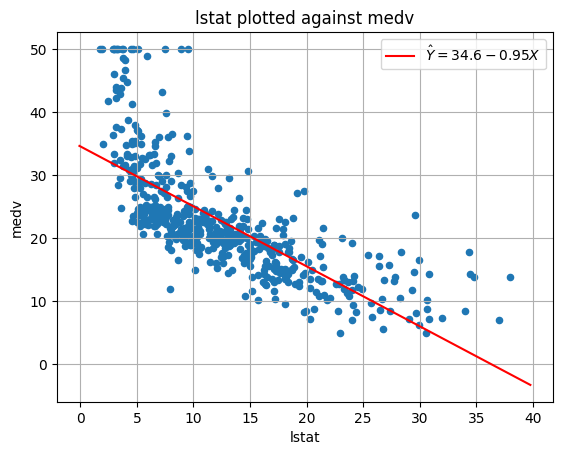

In [57]:
fig, ax = subplots()
boston.plot.scatter(x='lstat', y='medv', ax=ax)
x = np.linspace(*ax.get_xlim())
y = results.params.intercept + results.params.lstat*x
label = r'$\hat{{Y}} = {0:.3g} {1:.3g}X$'.format(results.params.intercept, results.params.lstat)
ax.plot(x, y, color='red', label=label) 
ax.set_title("lstat plotted against medv")
ax.legend()
ax.grid()